In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Uniform Sequence, $A^*$, single-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'uniform.a_star.single_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1457 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_243,1,0,0,32,235,2,3.734945,0.000137,0.196331,1,True,11.176770,11.176770,11.282078,11.282078,6
1,BARN,instance_157,42,0,1,42,364,3,5.059680,0.000525,0.306917,2,True,10.901818,10.901818,11.150344,11.150344,6
2,BARN,instance_035,42,0,0,32,287,2,7.939100,0.000129,0.211660,1,True,10.101599,10.101599,10.040025,10.040025,4
3,BARN,instance_237,1,2,0,52,575,4,5.251243,0.001902,0.368924,3,True,11.522240,10.299587,11.622568,10.304486,6
4,BARN,instance_001,567,2,5,112,1995,10,5.765861,0.002975,0.289566,9,True,10.203711,9.746490,10.241738,9.764983,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,BARN,instance_244,567,0,0,52,497,4,6.181746,0.000279,0.178069,3,True,11.795902,11.795902,11.888525,11.888525,8
1453,BARN,instance_071,42,0,0,32,272,2,8.037884,0.000143,0.123439,1,True,10.236835,10.236835,10.223886,10.223886,5
1454,BARN,instance_030,567,0,0,52,600,4,4.201188,0.000316,0.137031,3,True,11.425111,11.425111,11.472367,11.472367,9
1455,BARN,instance_212,8193,0,0,32,320,2,5.842665,0.000113,0.122764,1,True,9.692092,9.692092,9.618501,9.618501,5


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
1,BARN,instance_157,42,0,1,42,364,3,5.059680,0.000525,0.306917,2,True,10.901818,10.901818,11.150344,11.150344,6
3,BARN,instance_237,1,2,0,52,575,4,5.251243,0.001902,0.368924,3,True,11.522240,10.299587,11.622568,10.304486,6
4,BARN,instance_001,567,2,5,112,1995,10,5.765861,0.002975,0.289566,9,True,10.203711,9.746490,10.241738,9.764983,8
5,BARN,instance_295,1,1,0,42,435,3,3.168136,0.000424,0.414722,2,True,10.322893,10.032847,10.277846,10.022729,6
6,BARN,instance_299,567,0,2,62,706,5,4.028856,0.000778,0.114128,4,True,10.326130,10.326130,10.497057,10.497057,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,BARN,instance_158,567,0,0,52,561,4,4.201188,0.000318,0.073002,3,True,10.177131,10.177131,10.336130,10.336130,6
1449,BARN,instance_281,1,1,0,42,423,3,3.124020,0.000928,0.229963,2,True,11.522240,10.321943,11.622568,10.333177,6
1452,BARN,instance_244,567,0,0,52,497,4,6.181746,0.000279,0.178069,3,True,11.795902,11.795902,11.888525,11.888525,8
1454,BARN,instance_030,567,0,0,52,600,4,4.201188,0.000316,0.137031,3,True,11.425111,11.425111,11.472367,11.472367,9


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_243,1,0,0,32,235,2,3.734945,0.000137,0.196331,1,True,11.176770,11.176770,11.282078,11.282078,6
2,BARN,instance_035,42,0,0,32,287,2,7.939100,0.000129,0.211660,1,True,10.101599,10.101599,10.040025,10.040025,4
10,BARN,instance_129,1,0,0,32,298,2,3.231782,0.000130,0.201339,1,True,9.835873,9.835873,9.752391,9.752391,5
11,BARN,instance_060,1,0,0,32,311,2,3.231782,0.000146,0.081182,1,True,10.337132,10.337132,10.305313,10.305313,6
12,BARN,instance_152,1,0,0,32,253,2,7.294249,0.000131,0.307206,1,True,10.552443,10.552443,10.599583,10.599583,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,BARN,instance_049,42,0,0,32,239,2,7.939100,0.000127,0.079059,1,True,10.525518,10.525518,10.542069,10.542069,5
1450,BARN,instance_087,8193,0,0,32,339,2,5.842665,0.000138,0.057179,1,True,9.692092,9.692092,9.618501,9.618501,5
1451,BARN,instance_025,567,0,0,32,270,2,4.579120,0.000153,0.049275,1,True,12.470616,12.470616,12.731729,12.731729,6
1453,BARN,instance_071,42,0,0,32,272,2,8.037884,0.000143,0.123439,1,True,10.236835,10.236835,10.223886,10.223886,5


In [7]:
multiple_iterations['iterations'].describe()

count    933.000000
mean       3.627010
std        1.892554
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       19.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
1050,instance_181,42,19
342,instance_185,42,15
798,instance_099,42,14
1335,instance_229,1337,14
839,instance_137,42,14
1258,instance_069,1,12
1383,instance_244,42,11
640,instance_121,1337,11
934,instance_111,42,10
1386,instance_181,8193,10


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
1,instance_157,42,3,3,42,364,5.059680
3,instance_237,1,4,4,52,575,5.251243
4,instance_001,567,10,10,112,1995,5.765861
5,instance_295,1,3,3,42,435,3.168136
6,instance_299,567,5,5,62,706,4.028856
...,...,...,...,...,...,...,...
1448,instance_158,567,4,4,52,561,4.201188
1449,instance_281,1,3,3,42,423,3.124020
1452,instance_244,567,4,4,52,497,6.181746
1454,instance_030,567,4,4,52,600,4.201188


In [10]:
multiple_expansions['rgg_V'].describe()

count    933.000000
mean      58.270096
std       18.925536
min       42.000000
25%       42.000000
50%       52.000000
75%       62.000000
max      212.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count     933.000000
mean      762.632369
std       489.460317
min       269.000000
25%       480.000000
50%       631.000000
75%       881.000000
max      6922.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
3,instance_237,1,2
4,instance_001,567,2
7,instance_285,42,2
9,instance_062,8193,2
17,instance_226,567,2
...,...,...,...
1425,instance_200,1,4
1432,instance_033,1337,2
1437,instance_291,567,2
1446,instance_237,1337,3


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
4,instance_001,567,5
6,instance_299,567,2
18,instance_045,567,2
30,instance_106,1337,2
31,instance_289,567,3
...,...,...,...
1420,instance_261,1337,2
1425,instance_200,1,2
1431,instance_248,1,2
1436,instance_185,567,3


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_243,1,0.000137,0.196331
1,instance_157,42,0.000525,0.306917
2,instance_035,42,0.000129,0.211660
3,instance_237,1,0.001902,0.368924
4,instance_001,567,0.002975,0.289566
...,...,...,...,...
1452,instance_244,567,0.000279,0.178069
1453,instance_071,42,0.000143,0.123439
1454,instance_030,567,0.000316,0.137031
1455,instance_212,8193,0.000113,0.122764


In [15]:
time_data['plan_time'].describe()

count    1457.000000
mean        0.293985
std         1.832962
min         0.000101
25%         0.000144
50%         0.000414
75%         0.008542
max        25.265508
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1457.000000
mean        0.228414
std         0.150384
min         0.022640
25%         0.127193
50%         0.191957
75%         0.285416
max         1.247096
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

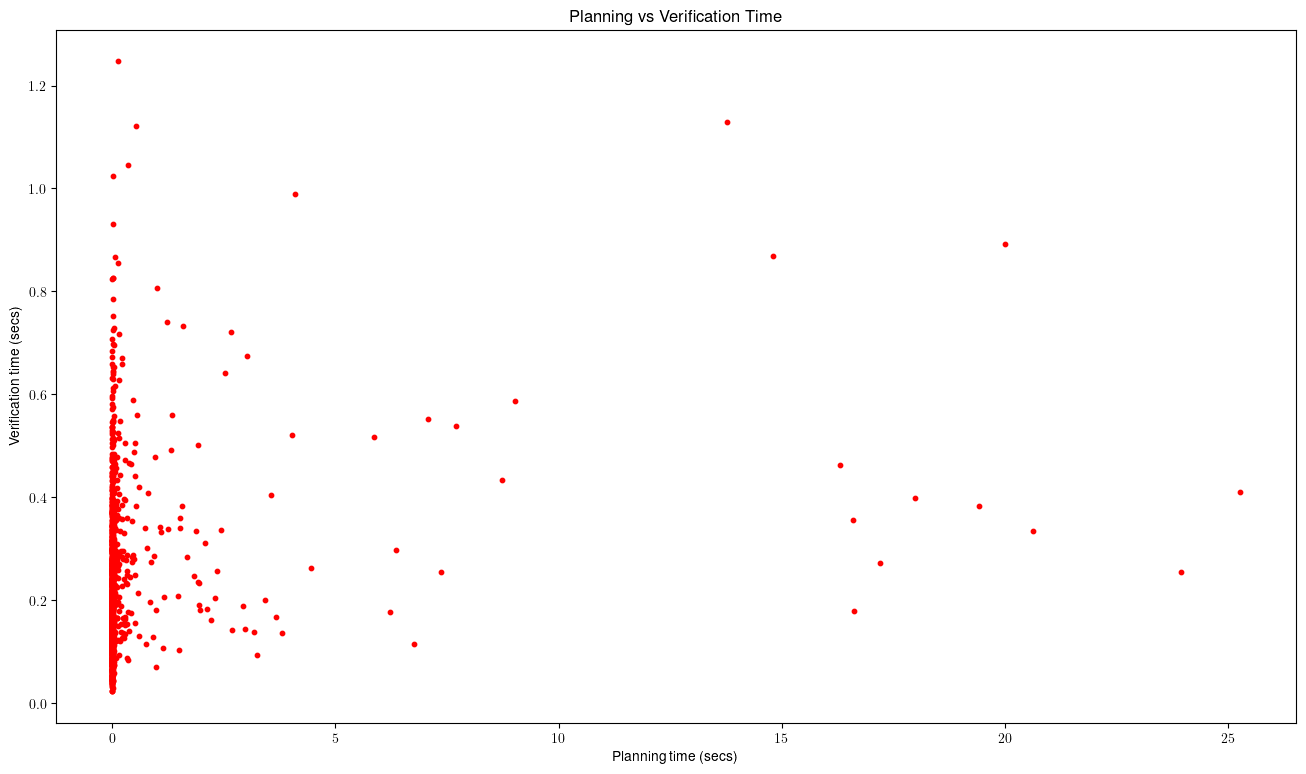

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

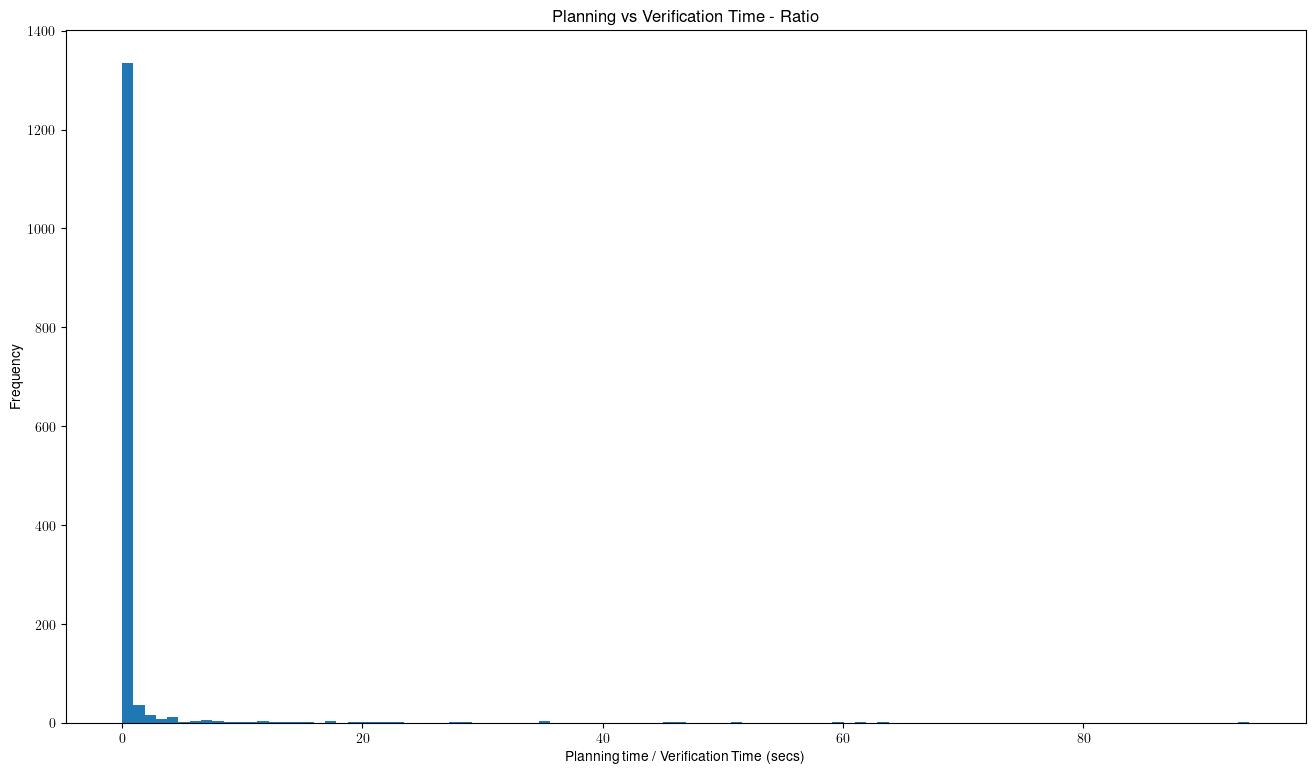

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

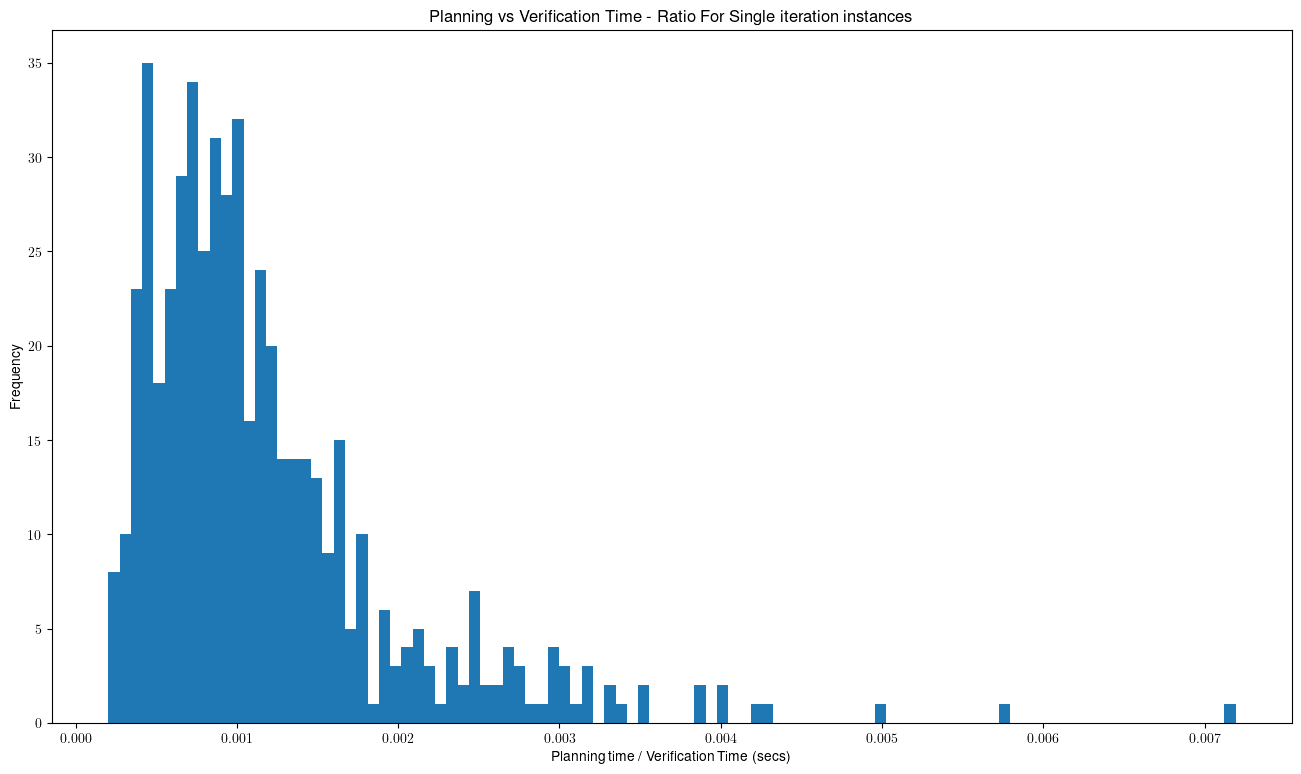

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

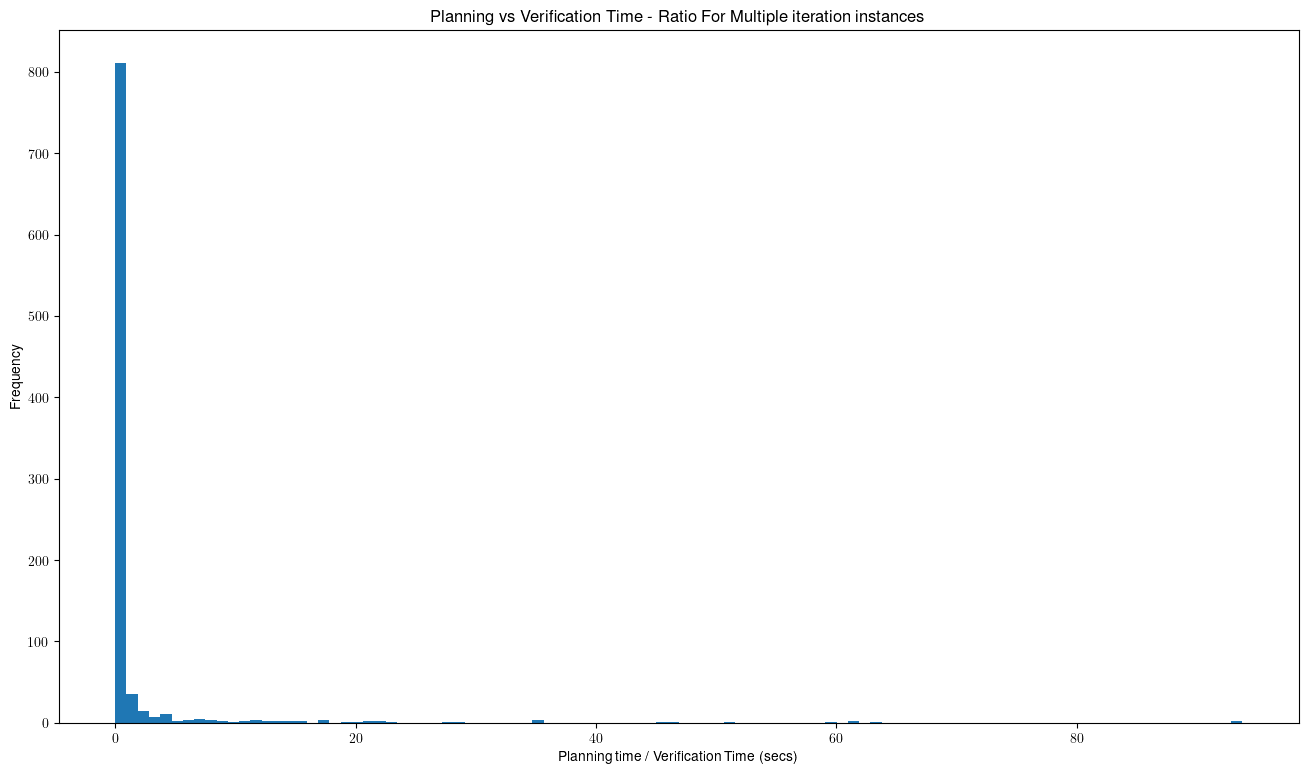

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

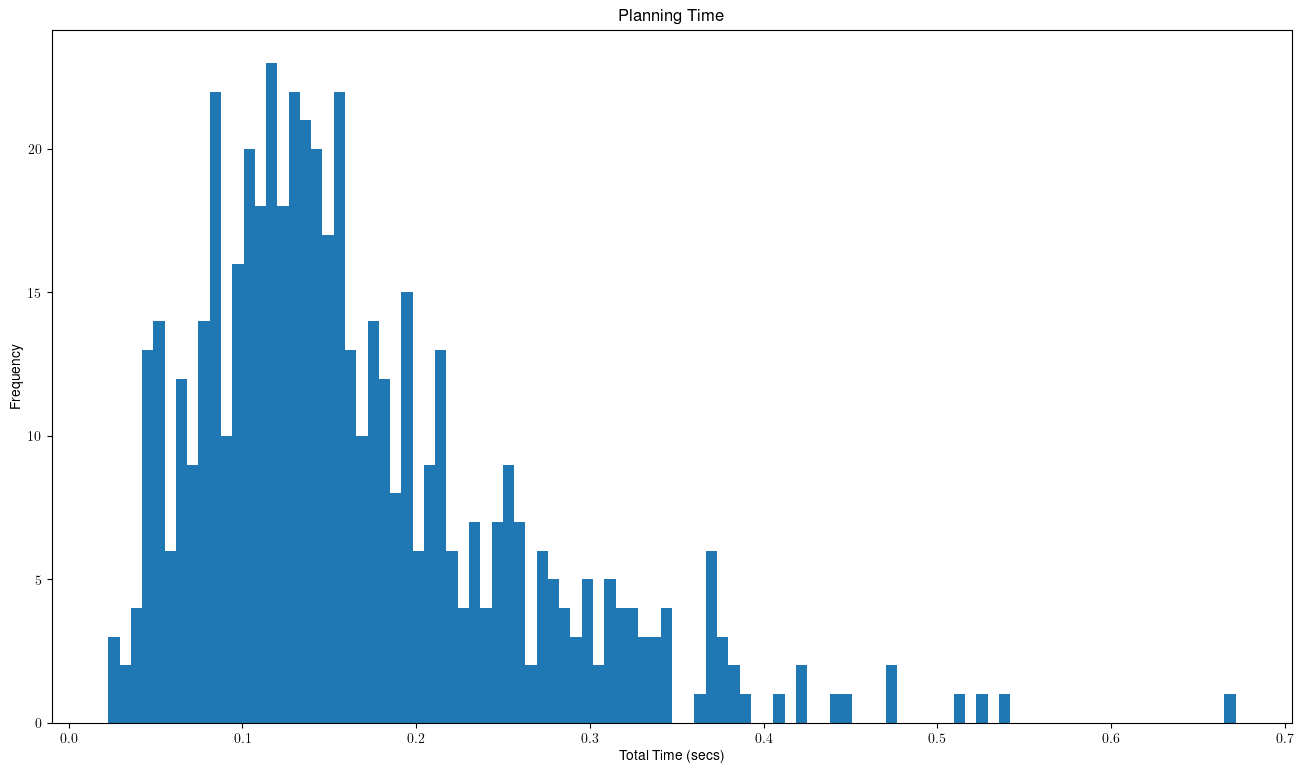

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

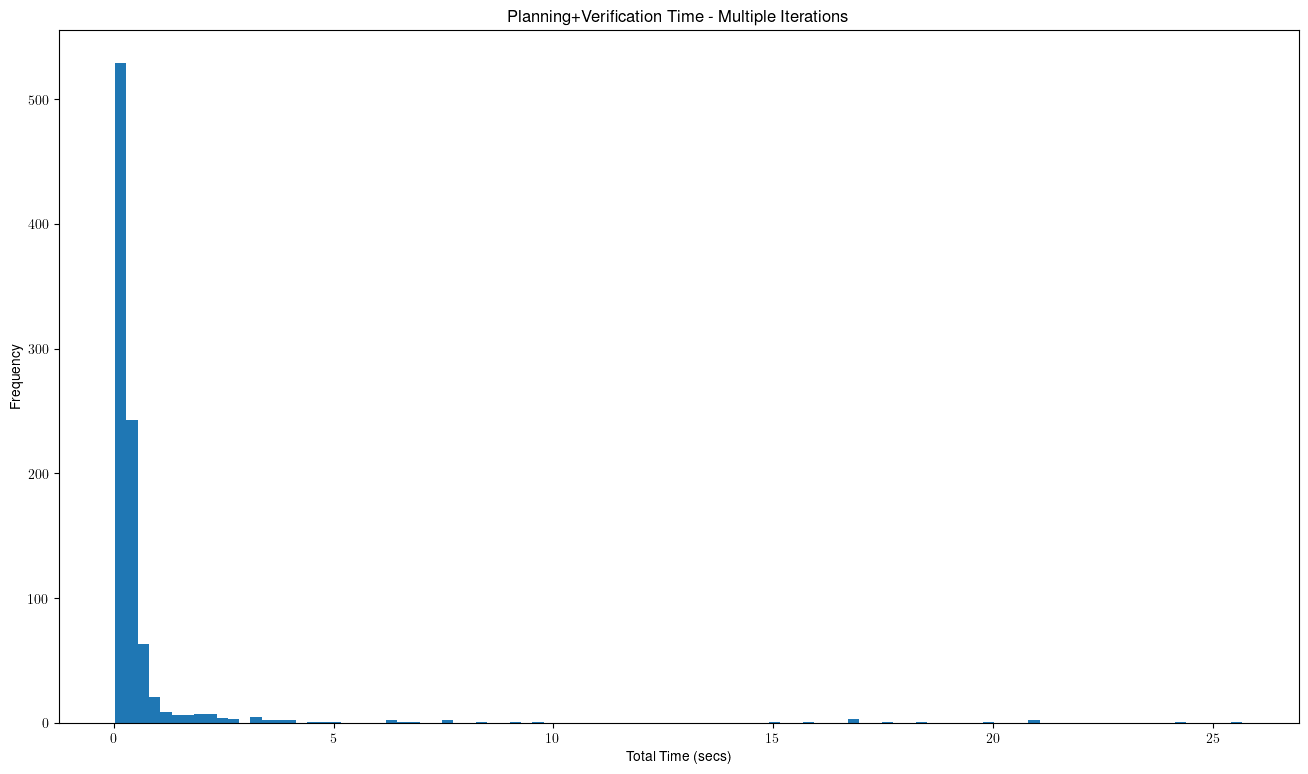

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,11.176770
1,10.901818
2,10.101599
3,10.299587
4,9.746490
...,...
1452,11.795902
1453,10.236835
1454,11.425111
1455,9.692092


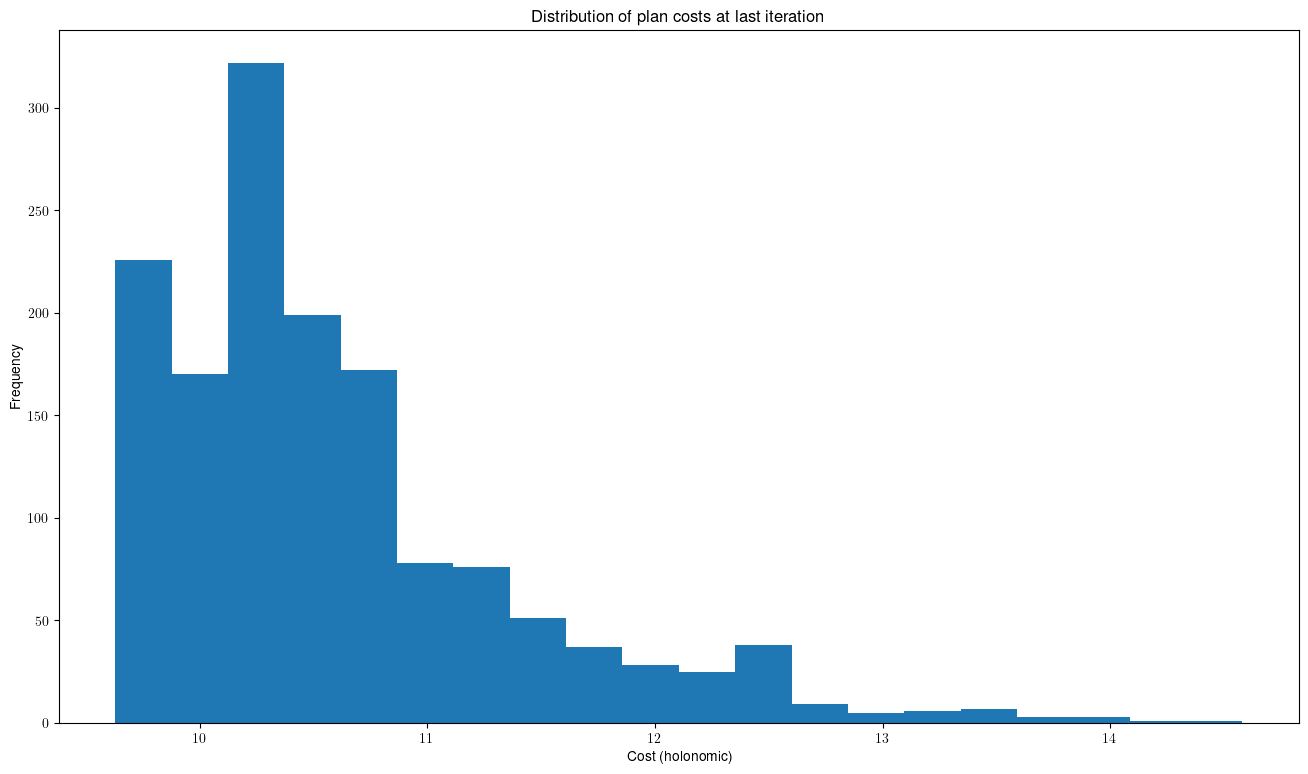

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

1       0.000000
3      -1.222653
4      -0.457221
5      -0.290046
6       0.000000
          ...   
1448    0.000000
1449   -1.200297
1452    0.000000
1454    0.000000
1456   -0.702618
Length: 933, dtype: float64

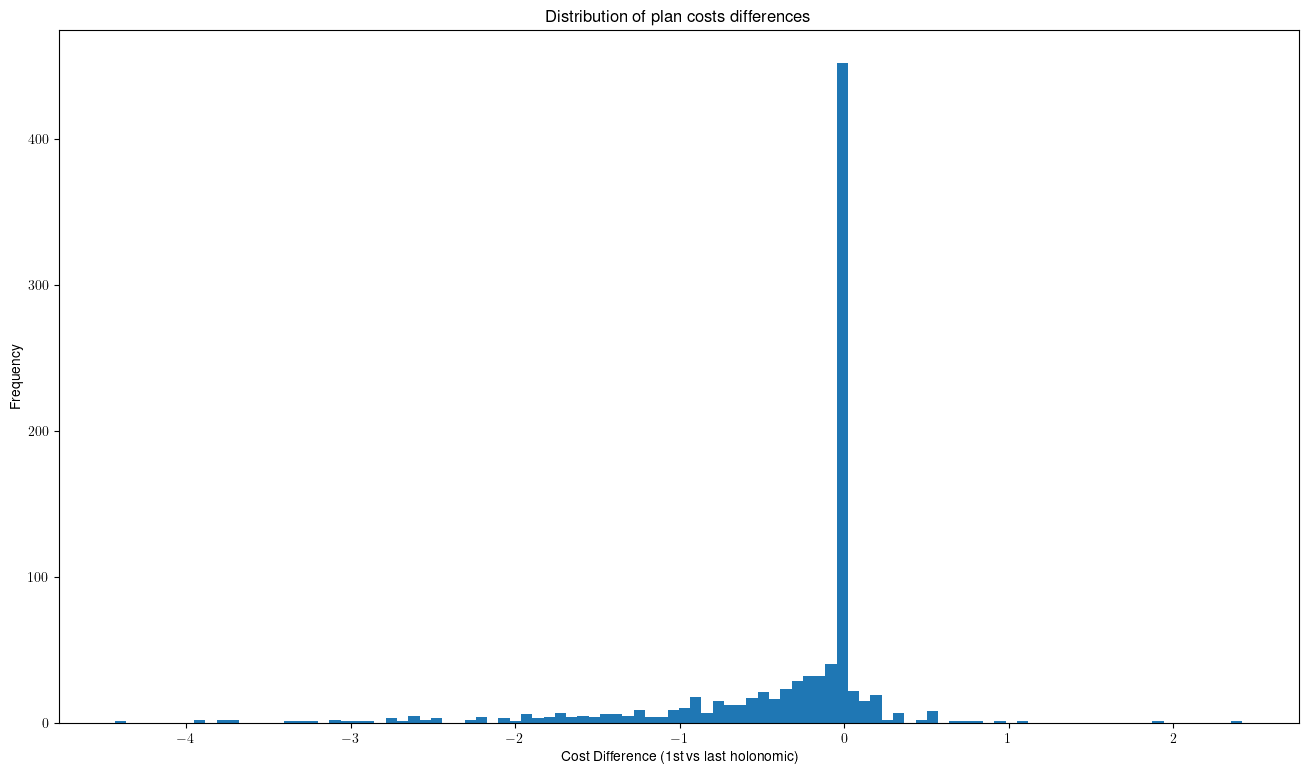

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.000000
1       0.000000
2       0.000000
3      -1.318083
4      -0.476755
          ...   
1452    0.000000
1453    0.000000
1454    0.000000
1455    0.000000
1456   -0.750582
Length: 1457, dtype: float64

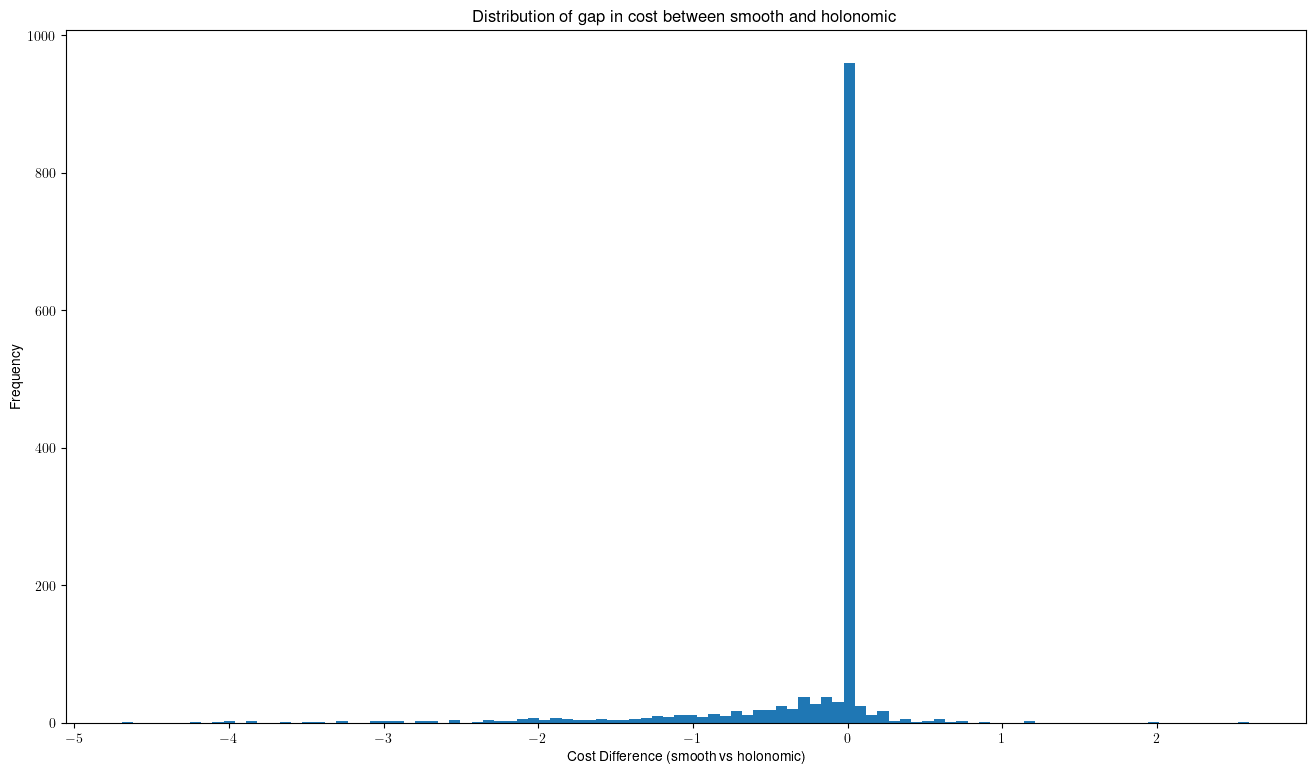

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_243,1,0.000137,0.196331,6
1,instance_157,42,0.000525,0.306917,6
2,instance_035,42,0.000129,0.211660,4
3,instance_237,1,0.001902,0.368924,6
4,instance_001,567,0.002975,0.289566,8
...,...,...,...,...,...
1452,instance_244,567,0.000279,0.178069,8
1453,instance_071,42,0.000143,0.123439,5
1454,instance_030,567,0.000316,0.137031,9
1455,instance_212,8193,0.000113,0.122764,5


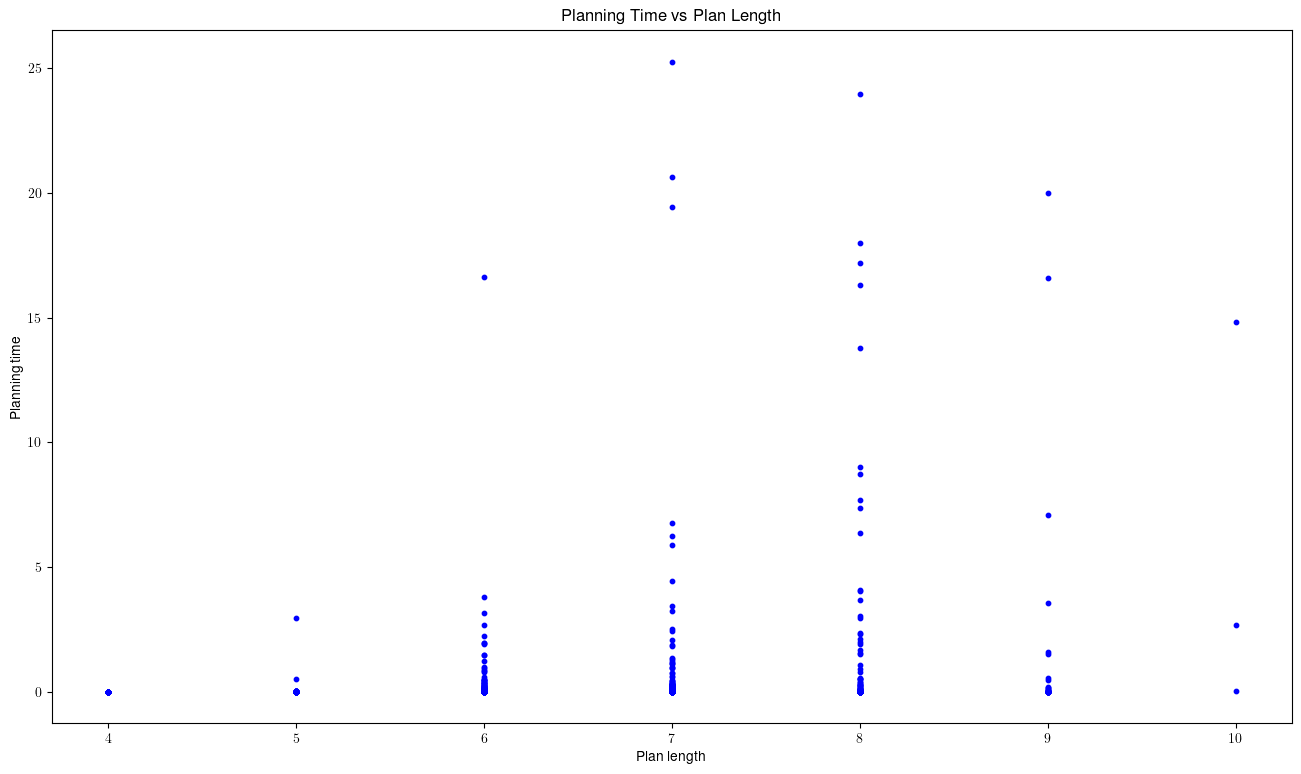

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_243,1,0.000137,0.196331,0,0
1,instance_157,42,0.000525,0.306917,0,1
2,instance_035,42,0.000129,0.211660,0,0
3,instance_237,1,0.001902,0.368924,2,0
4,instance_001,567,0.002975,0.289566,2,5
...,...,...,...,...,...,...
1452,instance_244,567,0.000279,0.178069,0,0
1453,instance_071,42,0.000143,0.123439,0,0
1454,instance_030,567,0.000316,0.137031,0,0
1455,instance_212,8193,0.000113,0.122764,0,0


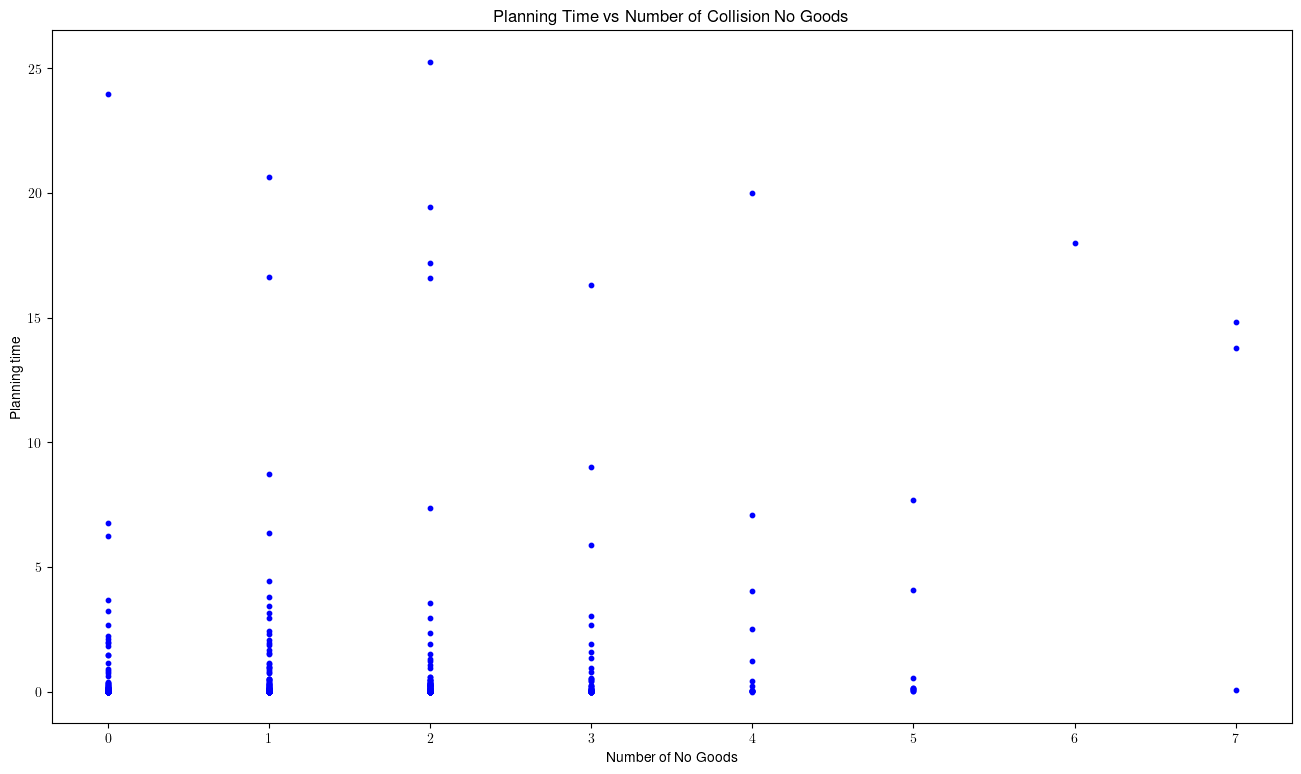

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

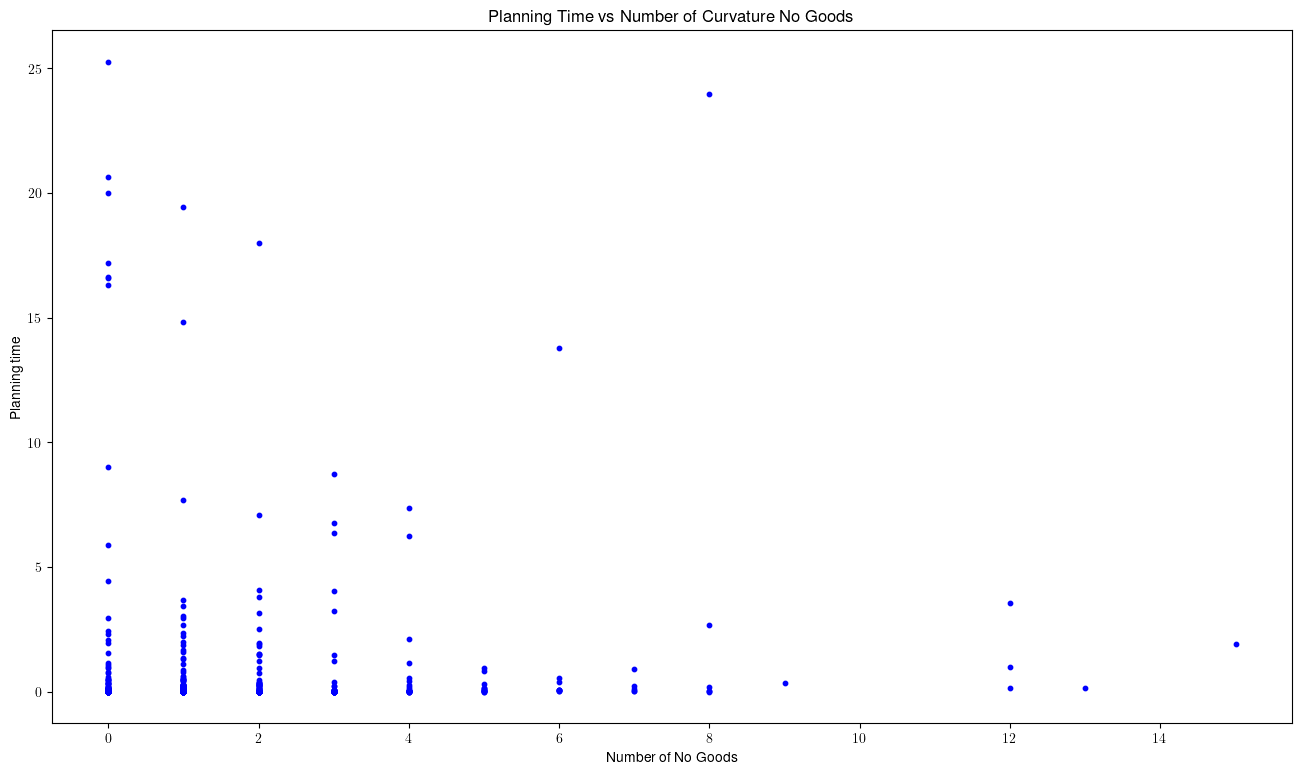

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[1030, 1106, 1252, 1283, 1371, 1393, 1436, 1445, 1457, 1457, 1457]


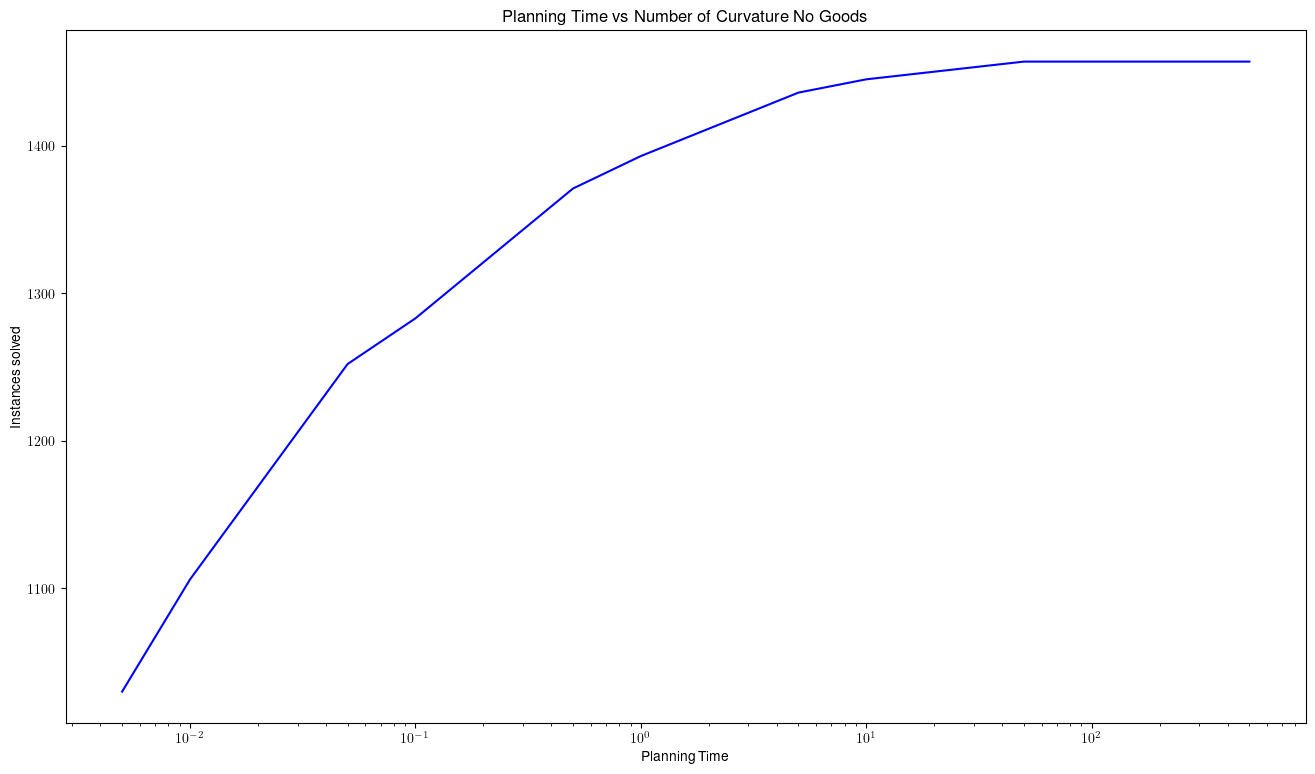

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_13959/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_243,1,1,0,0,0.000137,0.196331,0.196467
1,instance_157,42,2,0,1,0.000525,0.306917,0.307442
2,instance_035,42,1,0,0,0.000129,0.211660,0.211789
3,instance_237,1,3,2,0,0.001902,0.368924,0.370826
4,instance_001,567,9,2,5,0.002975,0.289566,0.292541
...,...,...,...,...,...,...,...,...
1452,instance_244,567,3,0,0,0.000279,0.178069,0.178348
1453,instance_071,42,1,0,0,0.000143,0.123439,0.123582
1454,instance_030,567,3,0,0,0.000316,0.137031,0.137347
1455,instance_212,8193,1,0,0,0.000113,0.122764,0.122877


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_243,1,1,0,0,0.000137,0.196331,0.196467,2.015593,4.652570,5.409091,2.657084,1.711966
instance_157,42,2,0,1,0.000525,0.306917,0.307442,1.765225,4.795159,4.974359,2.196642,1.524747
instance_035,42,1,0,0,0.000129,0.211660,0.211789,3.073924,8.752326,3.161290,8.267072,1.082392
instance_237,1,3,2,0,0.001902,0.368924,0.370826,1.841285,4.590614,4.903226,2.980547,1.082392
instance_001,567,9,2,5,0.002975,0.289566,0.292541,2.227753,5.856233,4.702703,3.887584,1.326360
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_244,567,3,0,0,0.000279,0.178069,0.178348,1.421647,3.129307,4.516129,1.015654,1.097042
instance_071,42,1,0,0,0.000143,0.123439,0.123582,3.151358,8.380021,3.812500,5.796257,1.142651
instance_030,567,3,0,0,0.000316,0.137031,0.137347,2.523335,6.374391,4.277778,4.744755,1.401955


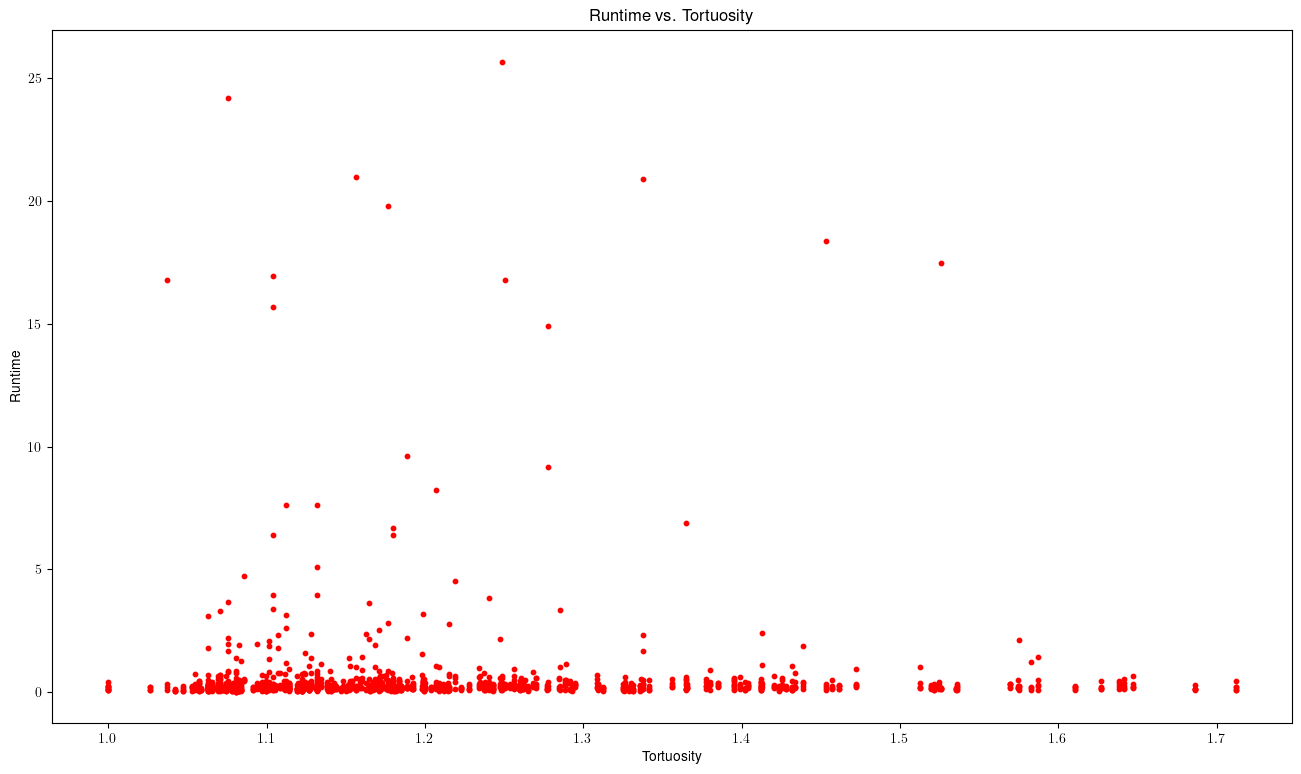

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

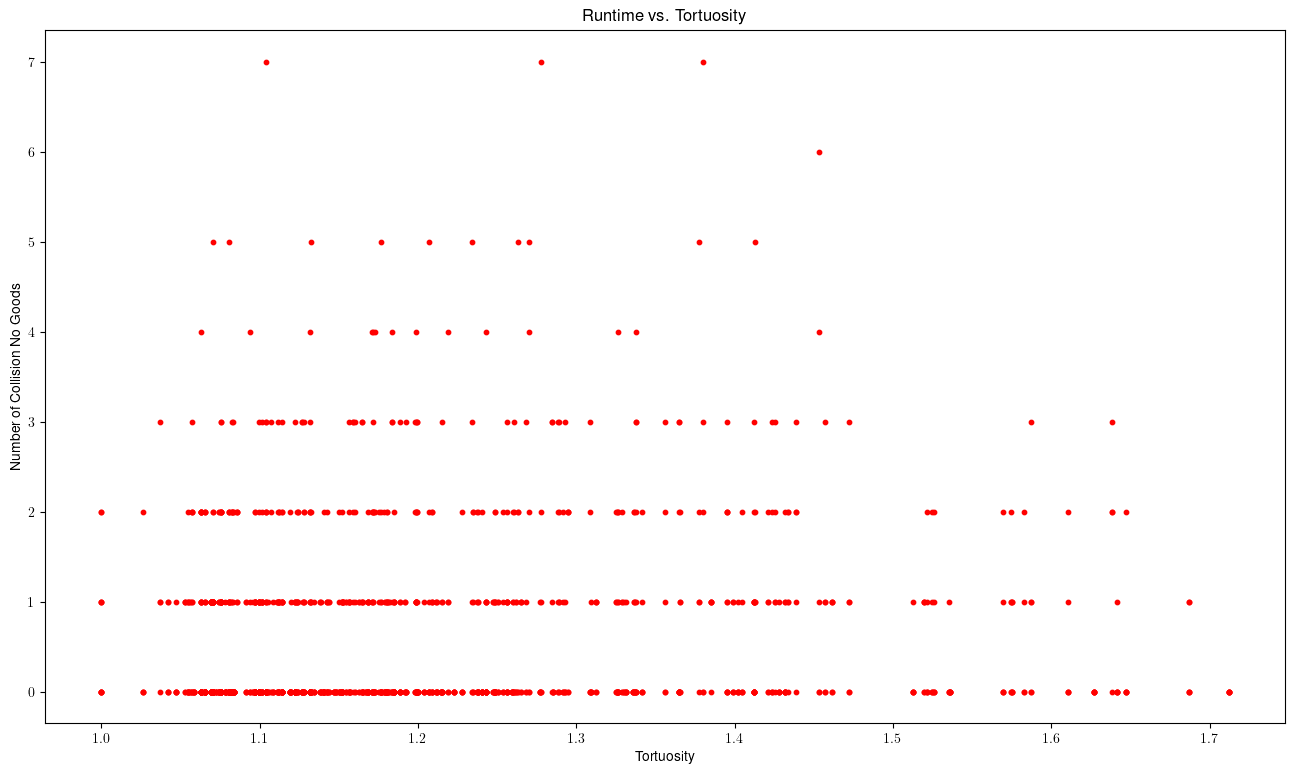

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

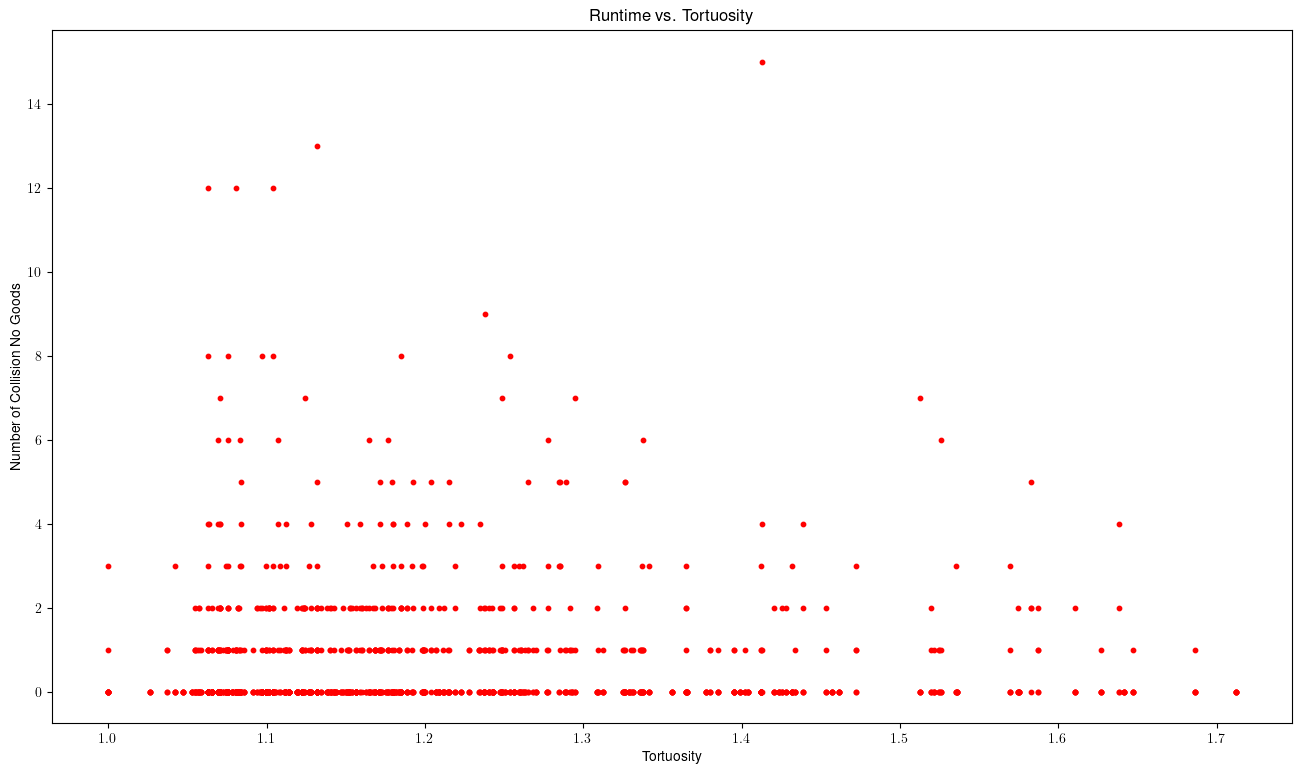

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()